# Pre-processing external dataset for project 2: Public Open Space Victoria

Public open space is defined as 'those areas of public land and local council land that have an accepted and ongoing community use for outdoor recreation and informal activities, and that are freely accessible to the public'.

The Victorian Environmental Assessment Council (VEAC) Metropolitan Melbourne Open Space Inventory does not include Commonwealth land; schools; cemeteries; gated facilities; road plantations; closed roads; concourses around stadia; inaccessible Trust for Nature properties; 'services and utilities' public land that does not have an ongoing recreational use; future open space (e.g. areas covered by Public Acquisition Overlays); and uncategorised public land. 



Source: https://data.aurin.org.au/dataset/vic-govt-delwp-datavic-publiclanduse-veac-metro-open-space-na

In [3]:
#Initialization packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the external dataset

In [4]:
#Direction to working directory
os.chdir('/Users/axbmac/Desktop/Applied Data Science/Project 2/Data')
print("Current working directory: {0}".format(os.getcwd())) 

Current working directory: /Users/axbmac/Desktop/Applied Data Science/Project 2/Data


In [5]:
area=pd.read_csv('datasource-VIC_Govt_DELWP-VIC_Govt_DELWP_datavic_PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.csv')

area.tail()

,FID,OBJECTID,REFERENCE_P,OS_GROUP,OWNERNAME_SUMMARY,HA,DOMINANT_LGA_NAME,VEAC_ID,OS_ID,MAJORITY_PARCEL_SPI,MAJORITY_PARCEL_PFI,POLYGON_SOURCE,NAME,SHAPE,SE_ANNO_CAD_DATA
19103,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,11849,M050109,Recreation corridor,Public authority land,1.3715,YARRA RANGES,M050109,18013,1\TP753493,217005592,VicTrack,Lilydale-Yarra Glen disused railway,"MULTIPOLYGON (((-37.67082138 145.37072589, -37...",NaN
19104,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,11851,M050111,Recreation corridor,Public authority land,6.2727,YARRA RANGES,M050111,18016,1\TP555179,212784093,VicTrack,Lilydale-Yarra Glen disused railway,"MULTIPOLYGON (((-37.69523026 145.37326437, -37...",NaN
19105,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,11852,M050112,Recreation corridor,Public authority land,1.0866,YARRA RANGES,M050112,18018,1\TP380974,217005589,VicTrack,Lilydale-Yarra Glen disused railway,"MULTIPOLYGON (((-37.68054179 145.37754384, -37...",NaN
19106,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,11859,M050119,Recreation corridor,Public authority land,3.7659,YARRA RANGES,M050119,18038,1\TP544987,217006678,VicTrack,Lilydale-Yarra Glen disused railway,"MULTIPOLYGON (((-37.73419028 145.36696632, -37...",NaN
19107,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,13683,P360089,Organised recreation area,Crown,1.9121,BOROONDARA,P360089,11217,150E\PP2209,172397057,VM CL Parcels,Cooper Park & Playground Reserve,"MULTIPOLYGON (((-37.84013765 145.09681719, -37...",NaN


In [6]:
#Dropping non-announced values
area=area.dropna(axis=1,how="any")
#area=area.dropna(axis = 1, how = 'any').reset_index(drop = True)
print(area)

                                                     FID  OBJECTID  \
0      PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...      5605   
1      PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...      5609   
2      PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...      5614   
3      PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...      5619   
4      PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...      5620   
...                                                  ...       ...   
19103  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...     11849   
19104  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...     11851   
19105  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...     11852   
19106  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...     11859   
19107  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...     13683   

      REFERENCE_P                       OS_GROUP      OWNERNAME_SUMMARY  \
0         M016559  Natural and semi-natural area              Municipal   
1        

In [7]:
#SE_ANNO_CAD_DATA dropped
area.isnull().sum()


FID                  0
OBJECTID             0
REFERENCE_P          0
OS_GROUP             0
OWNERNAME_SUMMARY    0
HA                   0
DOMINANT_LGA_NAME    0
VEAC_ID              0
OS_ID                0
POLYGON_SOURCE       0
NAME                 0
SHAPE                0
dtype: int64

In [11]:
#Renaming Ha to Hectar for and others for convenience 
area=area.rename(columns={"OBJECTID":"Object ID","DOMINANT_LGA_NAME":"DOMINANT_LGA","HA":"Hectar"})
print(area.head())

                                                 FID  Object ID REFERENCE_P  \
0  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...       5605     M016559   
1  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...       5609     M016563   
2  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...       5614     M016570   
3  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...       5619     M016576   
4  PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...       5620     M016577   

                        OS_GROUP OWNERNAME_SUMMARY   Hectar   DOMINANT_LGA  \
0  Natural and semi-natural area         Municipal   0.3253      FRANKSTON   
1  Natural and semi-natural area         Municipal   0.2908      MELBOURNE   
2  Natural and semi-natural area         Municipal   0.9784  MOONEE VALLEY   
3  Natural and semi-natural area         Municipal   0.0705        DAREBIN   
4  Natural and semi-natural area         Municipal  12.5029        DAREBIN   

   VEAC_ID  OS_ID POLYGON_SOURCE     NAME  \
0  M016559 

In [12]:
area

,FID,Object ID,REFERENCE_P,OS_GROUP,OWNERNAME_SUMMARY,Hectar,DOMINANT_LGA,VEAC_ID,OS_ID,POLYGON_SOURCE,NAME,SHAPE
0,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,5605,M016559,Natural and semi-natural area,Municipal,0.3253,FRANKSTON,M016559,5920,VM Parcels,NO DATA,"MULTIPOLYGON (((-38.15689498 145.19426088, -38..."
1,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,5609,M016563,Natural and semi-natural area,Municipal,0.2908,MELBOURNE,M016563,5923,VM Parcels,NO DATA,"MULTIPOLYGON (((-37.79984701 144.91271894, -37..."
2,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,5614,M016570,Natural and semi-natural area,Municipal,0.9784,MOONEE VALLEY,M016570,5928,VM Parcels,NO DATA,"MULTIPOLYGON (((-37.72088015 144.91227023, -37..."
3,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,5619,M016576,Natural and semi-natural area,Municipal,0.0705,DAREBIN,M016576,5879,VM Parcels,NO DATA,"MULTIPOLYGON (((-37.71389007 145.02530025, -37..."
4,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,5620,M016577,Natural and semi-natural area,Municipal,12.5029,DAREBIN,M016577,5933,ARCUE2002,NO DATA,"MULTIPOLYGON (((-37.7159755 145.02727046, -37...."
...,...,...,...,...,...,...,...,...,...,...,...,...
19103,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,11849,M050109,Recreation corridor,Public authority land,1.3715,YARRA RANGES,M050109,18013,VicTrack,Lilydale-Yarra Glen disused railway,"MULTIPOLYGON (((-37.67082138 145.37072589, -37..."
19104,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,11851,M050111,Recreation corridor,Public authority land,6.2727,YARRA RANGES,M050111,18016,VicTrack,Lilydale-Yarra Glen disused railway,"MULTIPOLYGON (((-37.69523026 145.37326437, -37..."
19105,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,11852,M050112,Recreation corridor,Public authority land,1.0866,YARRA RANGES,M050112,18018,VicTrack,Lilydale-Yarra Glen disused railway,"MULTIPOLYGON (((-37.68054179 145.37754384, -37..."
19106,PUBLICLANDUSE_VEAC_METRO_OPEN_SPACE.fid-3c3b5e...,11859,M050119,Recreation corridor,Public authority land,3.7659,YARRA RANGES,M050119,18038,VicTrack,Lilydale-Yarra Glen disused railway,"MULTIPOLYGON (((-37.73419028 145.36696632, -37..."


In [13]:
#Summing number of Hectar for each LGA even though we want to allocate by suburb

area.groupby("DOMINANT_LGA").sum().agg("Hectar")

DOMINANT_LGA
BANYULE                 905.4208
BAYSIDE                 441.4354
BOROONDARA              585.5363
BRIMBANK               1856.4288
CARDINIA              22516.3809
CASEY                  3931.0845
DAREBIN                 780.2496
FRANKSTON              1567.0374
GLEN EIRA               179.7237
GREATER DANDENONG       910.2399
HOBSONS BAY            1396.8885
HUME                   3130.6027
KINGSTON               1240.8102
KNOX                   2194.5566
MANNINGHAM             2023.5485
MARIBYRNONG             258.5436
MAROONDAH               616.6188
MELBOURNE               569.0238
MELTON                 2269.4129
MONASH                  778.2758
MOONEE VALLEY           518.6115
MORELAND                488.6367
MORNINGTON             8471.9433
NILLUMBIK              8492.6535
PORT PHILLIP            389.0421
STONNINGTON             172.9167
WHITEHORSE              641.7556
WHITTLESEA             8179.9392
WYNDHAM                2575.7162
YARRA                   302.31

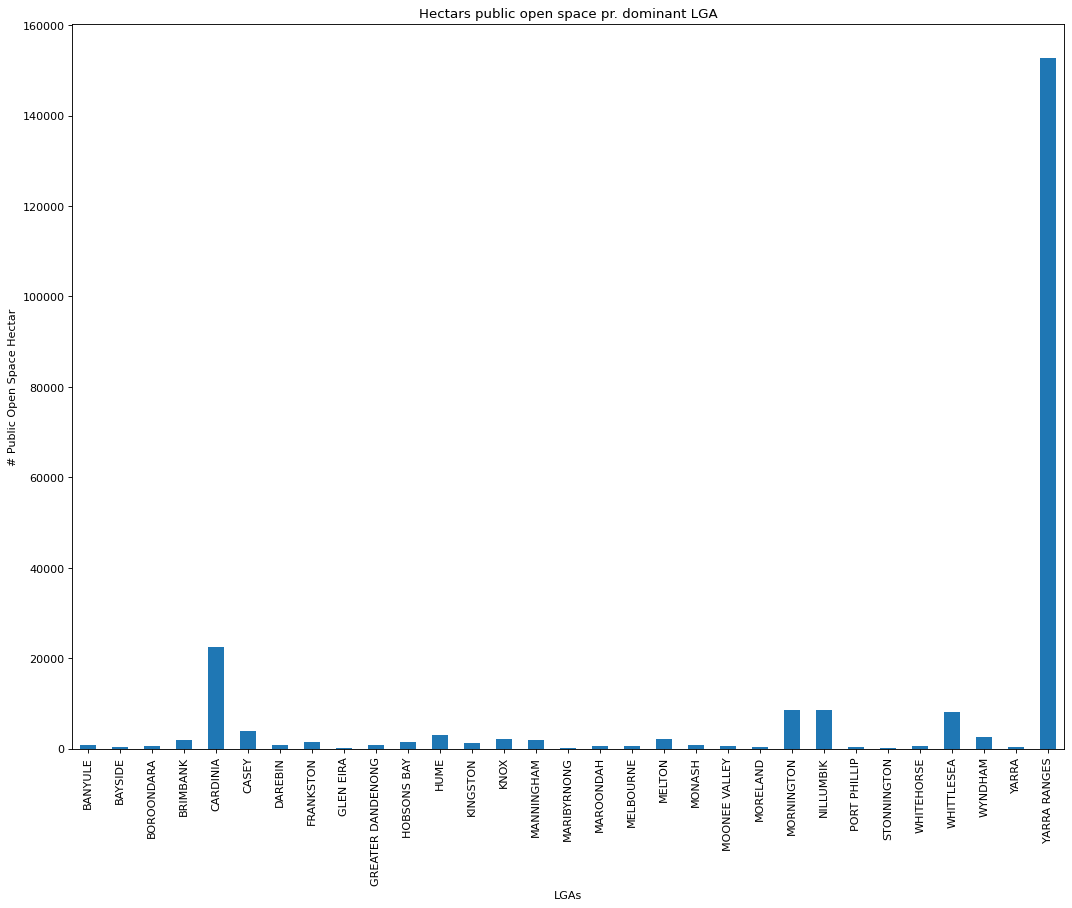

In [28]:
#Plot of Hectar pr. Dominant LGA
from matplotlib.pyplot import figure

plt.figure(figsize=(16, 12), dpi=80)
area.groupby('DOMINANT_LGA')['Hectar'].sum().plot(kind='bar')

plt.title("Hectars public open space pr. dominant LGA")
plt.xlabel("LGAs")
plt.ylabel("# Public Open Space Hectar")
plt.show()